In [207]:
import os
import os.path as osp
os.chdir('/home/gangus/cow-tus')
import re

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [241]:
def plot_learning_curves(name, experiment_dirs, splits, metric, ylim=None):
    res = plt.subplots(len(experiment_dirs))
    fig, axs = res[0], res[1:][0]
    if not isinstance(axs, np.ndarray):
        axs = [axs]
    fig.set_figheight(len(experiment_dirs) * 5)
    fig.set_figwidth(10)
    fig.suptitle(f'{name}: learning curves ({metric})')
    for experiment_idx, experiment_dir in enumerate(experiment_dirs):
        fig1_data = []
        cout_path = osp.join(experiment_dir, 'cout.txt')
        with open(cout_path, 'r') as f:
            line = f.readlines()[0]
            path_idx = re.search('Setting logging directory to: ', line).span()[1]
            log_path = osp.join(line[path_idx:-1], 'emmental.log')
        with open(log_path, 'r') as f:
            lines = f.readlines()
            for split in splits:
                query = f"{split}/{metric}': "
                primary_metric_str = re.findall(f"{query}[0-9\.]+", "\n".join(lines)) # guaranteed to be in order
                primary_metric_vals = [s[len(query):] for s in primary_metric_str]
                for epoch, val in enumerate(primary_metric_vals):
                    fig1_data.append({
                        'split': split,
                        'epoch': epoch,
                        'metric': metric,
                        'query': query,
                        f'{metric}': float(val),
                        'experiment_dir': experiment_dir,
                        'experiment_name': name
                    })
        fig1_df = pd.DataFrame(fig1_data)
        ax = axs[experiment_idx]
        if ylim:
            ax.set_ylim(ylim)
        sns.lineplot(data=fig1_df, x='epoch', y=f'{metric}', hue='split', ax=ax)
    return fig

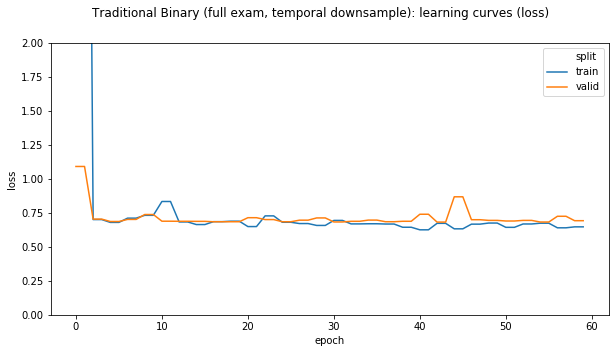

In [242]:
name = 'Traditional Binary (full exam, temporal downsample)'
experiment_dirs = [
    '/home/gangus/cow-tus/experiments/Q3-pres/single-instance-learning/ST-primary/temporal_downsample/no_augmentation/NO_RLS'
]
splits = ['train', 'valid']
metric = 'loss'
ylim=[0, 2]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

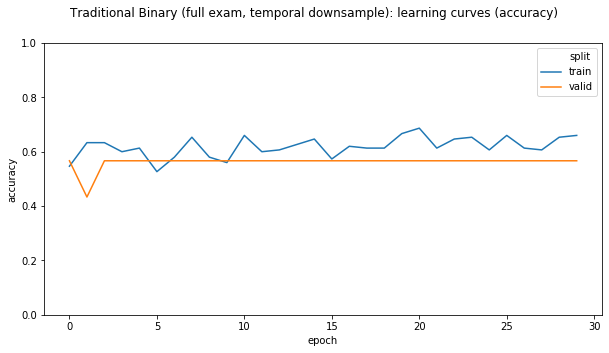

In [243]:
name = 'Traditional Binary (full exam, temporal downsample)'
experiment_dirs = [
    '/home/gangus/cow-tus/experiments/Q3-pres/single-instance-learning/ST-primary/temporal_downsample/no_augmentation/NO_RLS'
]
splits = ['train', 'valid']
metric = 'accuracy'
ylim=[0, 1]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

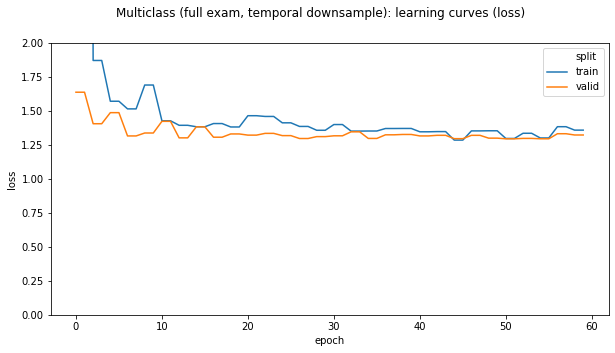

In [244]:
name = 'Multiclass (full exam, temporal downsample)'
experiment_dirs = [
    'experiments/Q3-pres/single-instance-learning/ST-primary_multiclass/temporal_downsample/no_augmentation/NO_RLS'
]
splits = ['train', 'valid']
metric = 'loss'
ylim=[0, 2]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

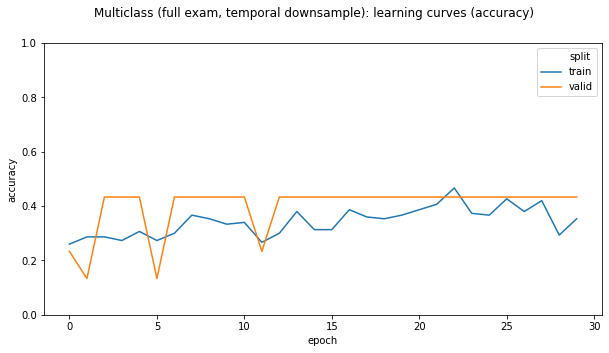

In [245]:
name = 'Multiclass (full exam, temporal downsample)'
experiment_dirs = [
    'experiments/Q3-pres/single-instance-learning/ST-primary_multiclass/temporal_downsample/no_augmentation/NO_RLS'
]
splits = ['train', 'valid']
metric = 'accuracy'
ylim=[0, 1]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

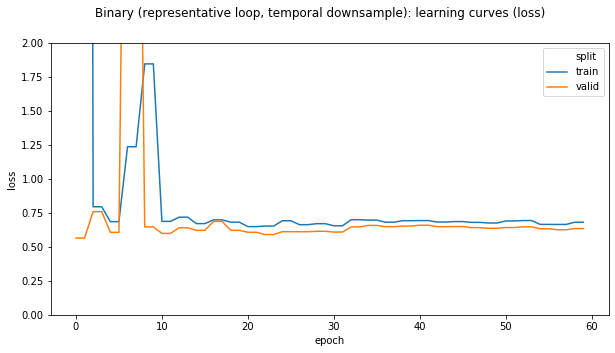

In [256]:
name = 'Binary (representative loop, temporal downsample)'
experiment_dirs = [
    'experiments/Q3-pres/single-instance-learning/ST-primary/temporal_downsample/no_augmentation/RLS',
]
splits = ['train', 'valid']
metric = 'loss'
ylim=[0, 2]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

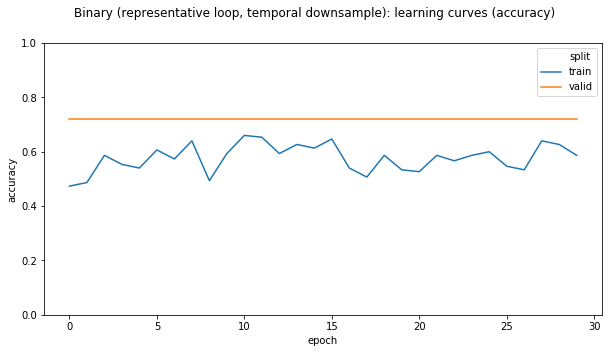

In [257]:
name = 'Binary (representative loop, temporal downsample)'
experiment_dirs = [
    'experiments/Q3-pres/single-instance-learning/ST-primary/temporal_downsample/no_augmentation/RLS',
]
splits = ['train', 'valid']
metric = 'accuracy'
ylim=[0, 1]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

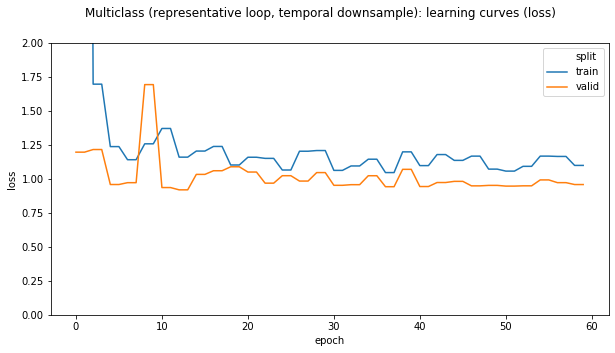

In [259]:
name = 'Multiclass (representative loop, temporal downsample)'
experiment_dirs = [
    'experiments/Q3-pres/single-instance-learning/ST-primary_multiclass/temporal_downsample/no_augmentation/RLS',
]
splits = ['train', 'valid']
metric = 'loss'
ylim=[0, 2]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

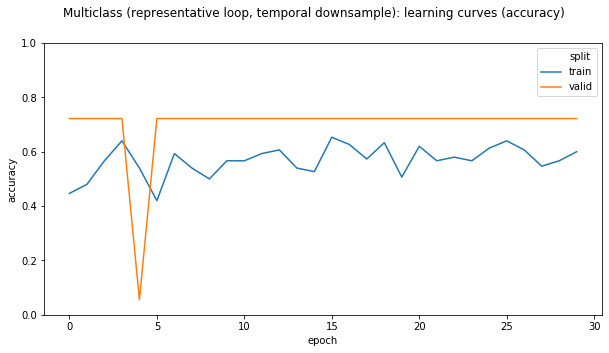

In [260]:
name = 'Multiclass (representative loop, temporal downsample)'
experiment_dirs = [
    'experiments/Q3-pres/single-instance-learning/ST-primary_multiclass/temporal_downsample/no_augmentation/RLS',
]
splits = ['train', 'valid']
metric = 'accuracy'
ylim=[0, 1]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

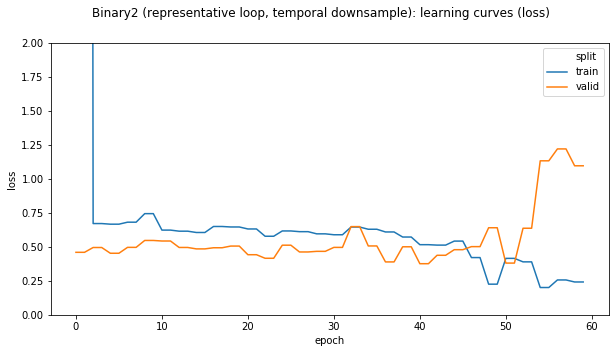

In [262]:
name = 'Binary2 (representative loop, temporal downsample)'
experiment_dirs = [
    'experiments/Q3-pres/single-instance-learning/ST-2normal_binary/temporal_downsample/no_augmentation/1',
]
splits = ['train', 'valid']
metric = 'loss'
ylim=[0, 2]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

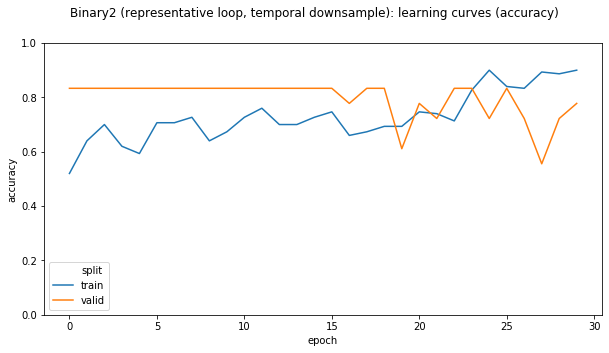

In [263]:
name = 'Binary2 (representative loop, temporal downsample)'
experiment_dirs = [
    'experiments/Q3-pres/single-instance-learning/ST-2normal_binary/temporal_downsample/no_augmentation/1',
]
splits = ['train', 'valid']
metric = 'accuracy'
ylim=[0, 1]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

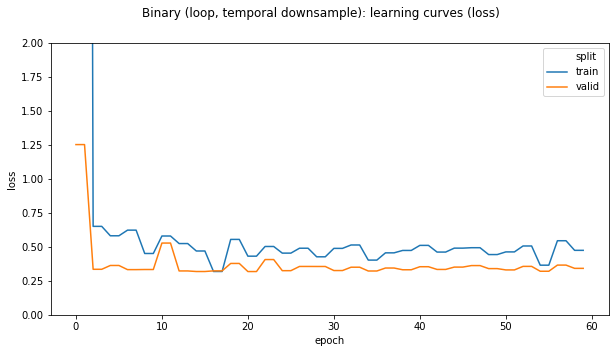

In [264]:
name = 'Binary (loop, temporal downsample)'
experiment_dirs = [
    'experiments/Q3-pres/_archived/instance-level-learning/ST-primary/temporal_downsample/no_augmentation/2',
]
splits = ['train', 'valid']
metric = 'loss'
ylim=[0,2]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

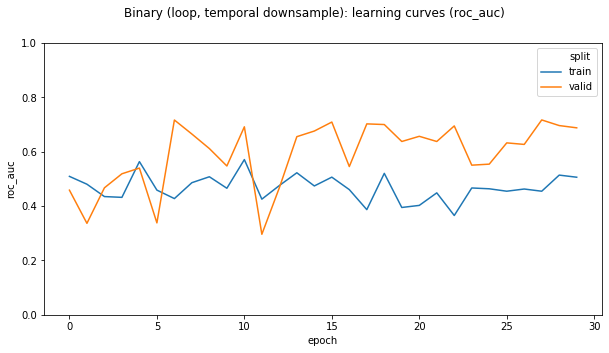

In [266]:
name = 'Binary (loop, temporal downsample)'
experiment_dirs = [
    'experiments/Q3-pres/_archived/instance-level-learning/ST-primary/temporal_downsample/no_augmentation/2',
]
splits = ['train', 'valid']
metric = 'roc_auc'
ylim=[0,1]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

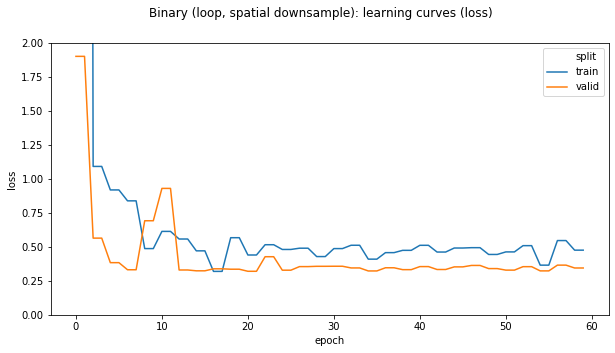

In [269]:
name = 'Binary (loop, spatial downsample)'
experiment_dirs = [
    'experiments/Q3-pres/_archived/instance-level-learning/ST-primary/spatial_downsample/no_augmentation/1',
]
splits = ['train', 'valid']
metric = 'loss'
ylim=[0,2]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

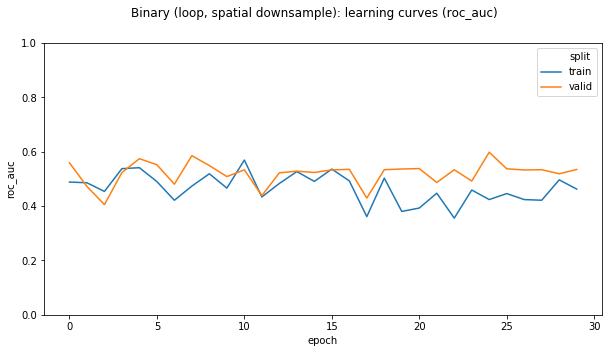

In [270]:
name = 'Binary (loop, spatial downsample)'
experiment_dirs = [
    'experiments/Q3-pres/_archived/instance-level-learning/ST-primary/spatial_downsample/no_augmentation/1',
]
splits = ['train', 'valid']
metric = 'roc_auc'
ylim=[0,1]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

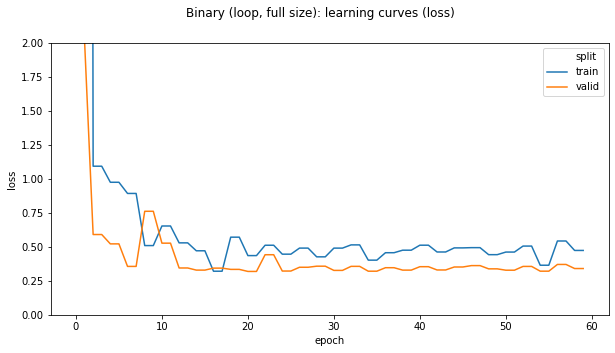

In [271]:
name = 'Binary (loop, full size)'
experiment_dirs = [
    'experiments/Q3-pres/_archived/instance-level-learning/ST-primary/full_size/no_augmentation/1',
]
splits = ['train', 'valid']
metric = 'loss'
ylim=[0,2]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

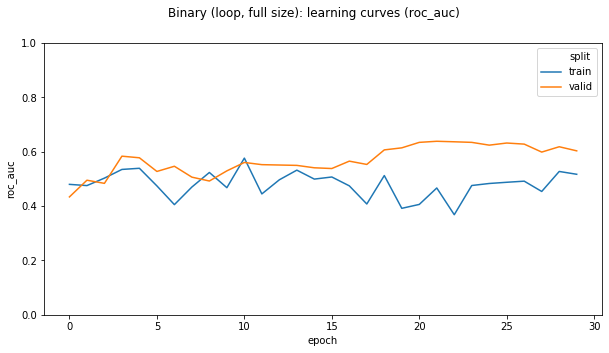

In [272]:
name = 'Binary (loop, full size)'
experiment_dirs = [
    'experiments/Q3-pres/_archived/instance-level-learning/ST-primary/full_size/no_augmentation/1',
]
splits = ['train', 'valid']
metric = 'roc_auc'
ylim=[0,1]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

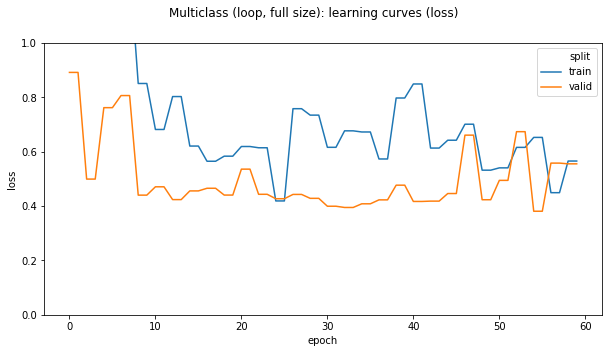

In [274]:
name = 'Multiclass (loop, full size)'
experiment_dirs = [
    'experiments/Q3-pres/_archived/instance-level-learning/ST-primary_multiclass/full_size/no_augmentation/1',
]
splits = ['train', 'valid']
metric = 'loss'
ylim=[0,1]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

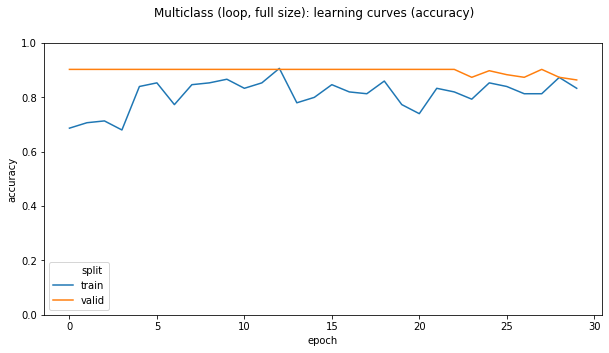

In [275]:
name = 'Multiclass (loop, full size)'
experiment_dirs = [
    'experiments/Q3-pres/_archived/instance-level-learning/ST-primary_multiclass/full_size/no_augmentation/1',
]
splits = ['train', 'valid']
metric = 'accuracy'
ylim=[0,1]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

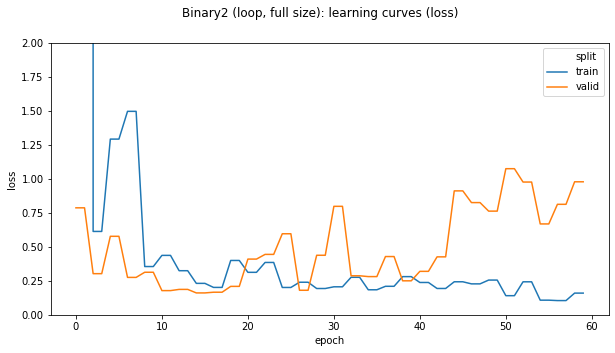

In [276]:
name = 'Binary2 (loop, full size)'
experiment_dirs = [
    'experiments/Q3-pres/_archived/instance-level-learning/ST-2normal_binary/full_size/no_augmentation/1',
]
splits = ['train', 'valid']
metric = 'loss'
ylim=[0,2]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

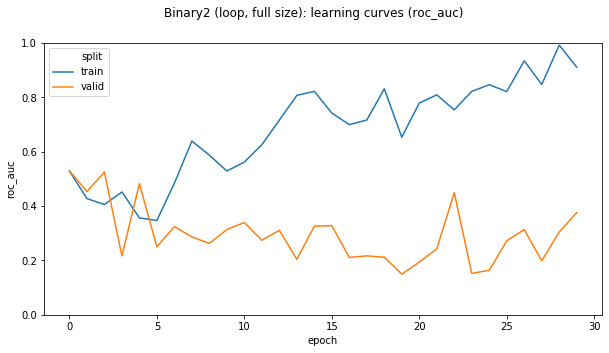

In [277]:
name = 'Binary2 (loop, full size)'
experiment_dirs = [
    'experiments/Q3-pres/_archived/instance-level-learning/ST-2normal_binary/full_size/no_augmentation/1',
]
splits = ['train', 'valid']
metric = 'roc_auc'
ylim=[0,1]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

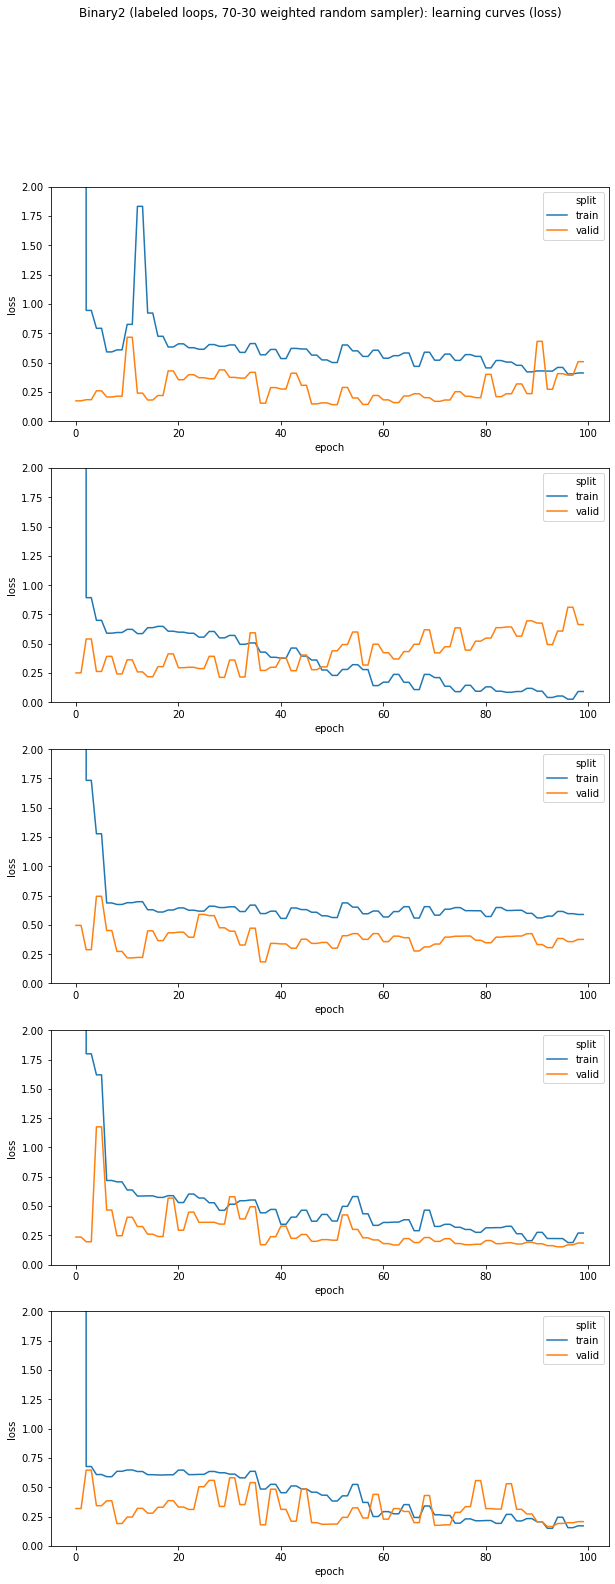

In [288]:
name = 'Binary2 (labeled loops, 70-30 weighted random sampler)'
experiment_dirs = [
    'experiments/instance-level-learning/2normal_binary/13',
    'experiments/instance-level-learning/2normal_binary/12',
    'experiments/instance-level-learning/2normal_binary/11',
    'experiments/instance-level-learning/2normal_binary/10',
    'experiments/instance-level-learning/2normal_binary/9'
]
splits = ['train', 'valid']
metric = 'loss'
ylim = [0, 2]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

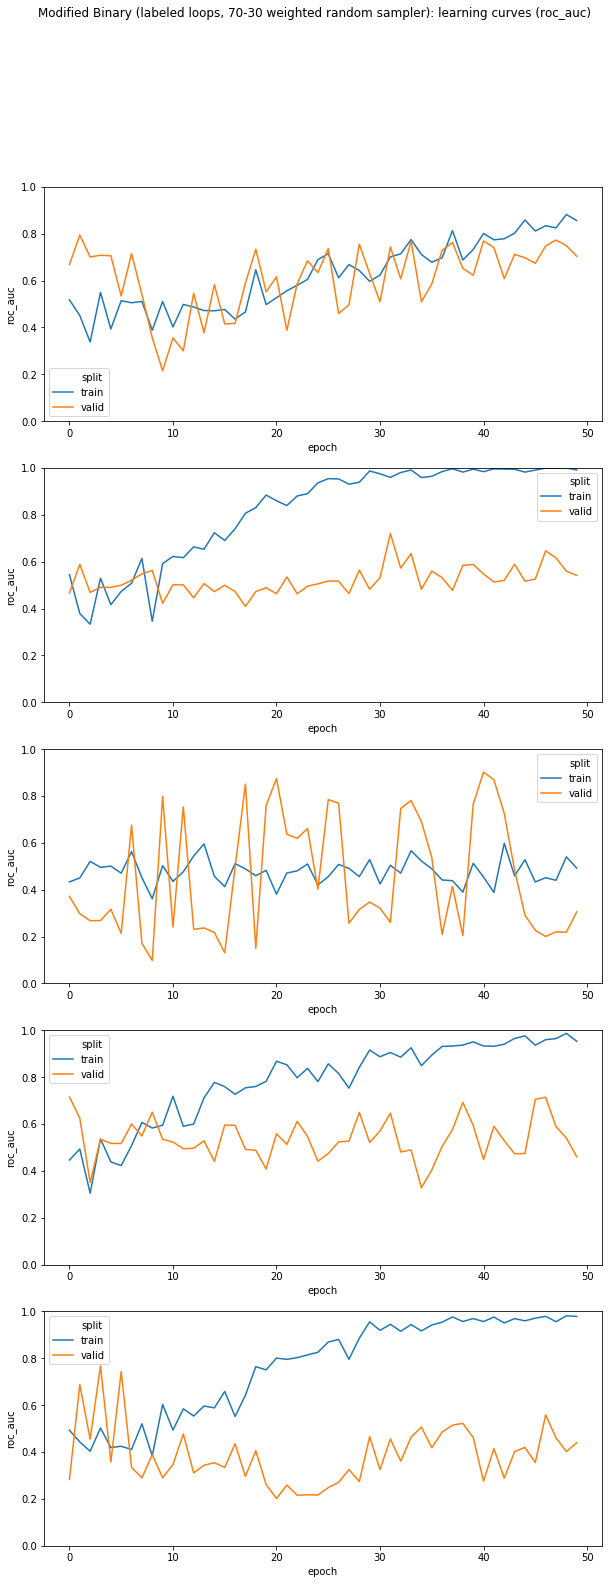

In [289]:
name = 'Modified Binary (labeled loops, 70-30 weighted random sampler)'
experiment_dirs = [
    'experiments/instance-level-learning/2normal_binary/13',
    'experiments/instance-level-learning/2normal_binary/12',
    'experiments/instance-level-learning/2normal_binary/11',
    'experiments/instance-level-learning/2normal_binary/10',
    'experiments/instance-level-learning/2normal_binary/9',
]
splits = ['train', 'valid']
metric = 'roc_auc'
ylim = [0, 1]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

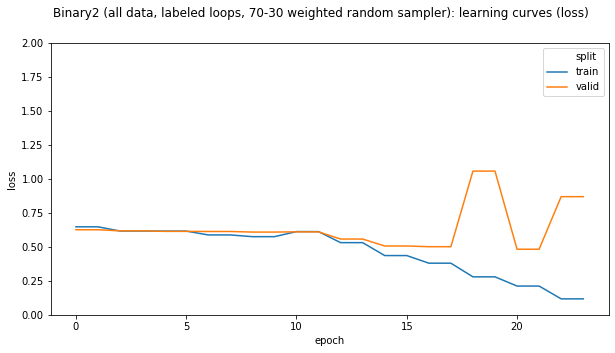

In [297]:
name = 'Binary2 (all data, labeled loops, 70-30 weighted random sampler)'
experiment_dirs = [
    'experiments/Q3-pres/instance-level-learning/ST-2normal_binary/full_size/no_augmentation/all_data/3'
]
splits = ['train', 'valid']
metric = 'loss'
ylim = [0, 2]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")

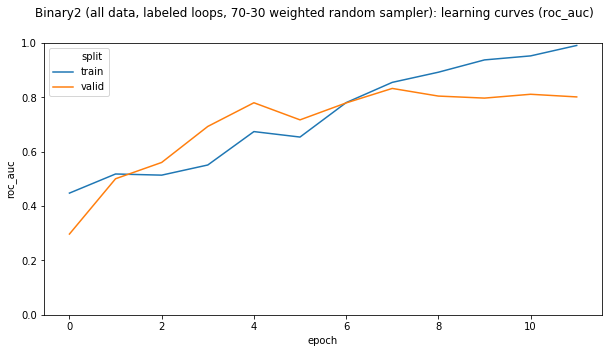

In [296]:
name = 'Binary2 (all data, labeled loops, 70-30 weighted random sampler)'
experiment_dirs = [
    'experiments/Q3-pres/instance-level-learning/ST-2normal_binary/full_size/no_augmentation/all_data/3'
]
splits = ['train', 'valid']
metric = 'roc_auc'
ylim = [0, 1]
fig = plot_learning_curves(name, experiment_dirs, splits, metric, ylim=ylim)
plt.savefig(f"figs/Q3-presentation/{name.replace(' ', '-')}_{metric}.png")